# DATASET CLEANING AND EDITTING

Bu bölümde aşağıdaki işlemleri uyguladım:
- Veri setimde bulunan Null değerlerin kontrolünü sağladım.
- Null değerlerimin bulunduğu sütun farklı ölçüm yöntemleri kullanılarak ortaya çıkarılan bir deprem şiddet türüdür.
- Bu sütundaki değerleri "0" ile doldurdum.
- Gereksiz olan,kullanılmaycak sütunları kaldırdım.
- Veri tiplerini kontrol ederek Tarih ve zaman içeren sütunlarda veri tiplerini datetime olarak güncelledim.
- Enlem ,boylam bilgilerini tutan sütun verilerimi görselleştirmede kullanacağım için GeoDataFrame olarak dönüştürdüm.

In [770]:
import pandas as pd

df = pd.read_csv("C:/Users/MyPc/Desktop/sisterslab-proje/deprem_veri_seti/veriler.csv")
df.head()

No         Deprem Kodu Olus tarihi  Olus zamani    Enlem   Boylam  Der(km)  \
0       1  20230731215338  2023.07.31  21:53:38.29  37.4153  37.1703      4.0   
1       2  20230731152316  2023.07.31  15:23:16.85  38.1413  38.4340      5.2   
2       3  20230731025049  2023.07.31  02:50:49.84  37.8352  26.8353      6.2   
3       4  20230730201940  2023.07.30  20:19:40.49  40.8085  31.0183      5.3   
4       5  20230730161352  2023.07.30  16:13:52.62  38.1290  38.1863      2.4   

    xM   MD   ML   Mw   Ms   Mb Tip  \
0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                                 Yer  
0     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  
1               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]  
2                           SISAM ADASI (EGE DENIZI)  
3       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  
4  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]

In [771]:
df.columns

Index(['No    ', 'Deprem Kodu', 'Olus tarihi', 'Olus zamani', 'Enlem',
       'Boylam', 'Der(km)', 'xM', 'MD', 'ML', 'Mw', 'Ms', 'Mb', 'Tip', 'Yer'],
      dtype='object')

In [772]:
data = df.drop(columns = ["No    "])

In [773]:
data.isnull().sum()

Deprem Kodu        0
Olus tarihi        0
Olus zamani        0
Enlem              0
Boylam             0
Der(km)            0
xM                 0
MD                 0
ML                 0
Mw             37078
Ms                 0
Mb                 0
Tip                0
Yer                0
dtype: int64

In [774]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Deprem Kodu  50000 non-null  int64  
 1   Olus tarihi  50000 non-null  object 
 2   Olus zamani  50000 non-null  object 
 3   Enlem        50000 non-null  float64
 4   Boylam       50000 non-null  float64
 5   Der(km)      50000 non-null  float64
 6   xM           50000 non-null  float64
 7   MD           50000 non-null  float64
 8   ML           50000 non-null  float64
 9   Mw           12922 non-null  float64
 10  Ms           50000 non-null  float64
 11  Mb           50000 non-null  float64
 12  Tip          50000 non-null  object 
 13  Yer          50000 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 5.3+ MB


In [775]:
data.duplicated().sum()

0

In [776]:
data.fillna(0 , inplace=True)

In [777]:
data.describe()

Deprem Kodu         Enlem        Boylam       Der(km)            xM  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000  50000.000000   
mean   2.009237e+13     38.300424     32.963727      9.995948      3.344862   
std    7.962870e+10      1.464283      5.746905     12.580761      0.395971   
min    1.994091e+13     35.000000     26.000000      0.000000      3.000000   
25%    2.004022e+13     37.192725     27.820000      5.000000      3.100000   
50%    2.008111e+13     38.360000     30.880000      6.900000      3.200000   
75%    2.015102e+13     39.267550     38.025100     10.500000      3.500000   
max    2.023073e+13     41.998200     44.999200    154.700000      7.700000   

                 MD            ML            Mw            Ms            Mb  
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000  
mean       1.921914      1.464486      0.743576      0.001400      0.051334  
std        1.613644      1.732178      1.449180      0.087321      0.472931  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000      0.000000  
50%        3.000000      0.000000      0.000000      0.000000      0.000000  
75%        3.200000      3.200000      0.000000      0.000000      0.000000  
max        6.700000      7.500000      7.700000      6.400000      5.800000

In [778]:
# 'Olus tarihi' adlı sütunu tarih veri tipine çevirin
data["Olus tarihi"] = pd.to_datetime(data["Olus tarihi"], format="%Y.%m.%d")

In [779]:
data["Olus zamani"] = pd.to_datetime(data["Olus zamani"], format="%H:%M:%S.%f")

In [780]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Deprem Kodu  50000 non-null  int64         
 1   Olus tarihi  50000 non-null  datetime64[ns]
 2   Olus zamani  50000 non-null  datetime64[ns]
 3   Enlem        50000 non-null  float64       
 4   Boylam       50000 non-null  float64       
 5   Der(km)      50000 non-null  float64       
 6   xM           50000 non-null  float64       
 7   MD           50000 non-null  float64       
 8   ML           50000 non-null  float64       
 9   Mw           50000 non-null  float64       
 10  Ms           50000 non-null  float64       
 11  Mb           50000 non-null  float64       
 12  Tip          50000 non-null  object        
 13  Yer          50000 non-null  object        
dtypes: datetime64[ns](2), float64(9), int64(1), object(2)
memory usage: 5.3+ MB


In [781]:
data.head()

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   
1  20230731152316  2023-07-31 1900-01-01 15:23:16.850  38.1413  38.4340   
2  20230731025049  2023-07-31 1900-01-01 02:50:49.840  37.8352  26.8353   
3  20230730201940  2023-07-30 1900-01-01 20:19:40.490  40.8085  31.0183   
4  20230730161352  2023-07-30 1900-01-01 16:13:52.620  38.1290  38.1863   

   Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0      4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1      5.2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2      6.2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3      5.3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4      2.4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                                 Yer  
0     DOGANLI-PAZARCIK (KAHRAMANMARAS) [East 1.3 km]  
1               AKSU-SINCIK (ADIYAMAN) [West 6.4 km]  
2                           SISAM ADASI (EGE DENIZI)  
3       ICMELER-GOLYAKA (DUZCE) [South East  0.7 km]  
4  CAMPINAR-CELIKHAN (ADIYAMAN) [North West  4.3 km]

In [782]:
# "Enlem" ve "Boylam" adlı sütunları GeoDataFrame olarak dönüştürdük.
import geopandas as gpd
from shapely.geometry import Point

data["Koordinatlar"] = data["Enlem"].astype(str) + ', ' + data["Boylam"].astype(str)
geometry = data["Koordinatlar"].apply(lambda x: Point([float(coord) for coord in x.split(',')]))
new_data = gpd.GeoDataFrame(data, geometry=geometry)

In [783]:
# "Yer" sütunundaki "East" ve "West" ifadelerini kaldırılır.
new_data["Yer"] = new_data['Yer'].str.replace(r'\s*\[.*\]', '', regex=True)

In [784]:
new_data.describe()

Deprem Kodu                 Olus tarihi  \
count  5.000000e+04                       50000   
mean   2.009237e+13  2009-08-24 08:22:19.776000   
min    1.994091e+13         1994-09-11 00:00:00   
25%    2.004022e+13         2004-02-23 00:00:00   
50%    2.008111e+13         2008-11-05 00:00:00   
75%    2.015102e+13         2015-10-23 06:00:00   
max    2.023073e+13         2023-07-31 00:00:00   
std    7.962870e+10                         NaN   

                         Olus zamani         Enlem        Boylam  \
count                          50000  50000.000000  50000.000000   
mean   1900-01-01 12:02:23.187282944     38.300424     32.963727   
min       1900-01-01 00:00:00.040000     35.000000     26.000000   
25%    1900-01-01 05:38:58.497500160     37.192725     27.820000   
50%    1900-01-01 12:05:59.089999872     38.360000     30.880000   
75%       1900-01-01 18:22:56.800000     39.267550     38.025100   
max       1900-01-01 23:59:58.220000     41.998200     44.999200   
std                              NaN      1.464283      5.746905   

            Der(km)            xM            MD            ML            Mw  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       9.995948      3.344862      1.921914      1.464486      0.743576   
min        0.000000      3.000000      0.000000      0.000000      0.000000   
25%        5.000000      3.100000      0.000000      0.000000      0.000000   
50%        6.900000      3.200000      3.000000      0.000000      0.000000   
75%       10.500000      3.500000      3.200000      3.200000      0.000000   
max      154.700000      7.700000      6.700000      7.500000      7.700000   
std       12.580761      0.395971      1.613644      1.732178      1.449180   

                 Ms            Mb  
count  50000.000000  50000.000000  
mean       0.001400      0.051334  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        6.400000      5.800000  
std        0.087321      0.472931

In [785]:
drop_columns = ["Deprem Kodu","Olus zamani","Tip","Yer","Koordinatlar","geometry"]
corr_datas = new_data.drop(columns = drop_columns, axis=1)
corr_datas

Olus tarihi    Enlem   Boylam  Der(km)   xM   MD   ML   Mw   Ms   Mb
0      2023-07-31  37.4153  37.1703      4.0  3.5  0.0  3.5  3.4  0.0  0.0
1      2023-07-31  38.1413  38.4340      5.2  3.5  0.0  3.5  3.4  0.0  0.0
2      2023-07-31  37.8352  26.8353      6.2  3.0  0.0  3.0  0.0  0.0  0.0
3      2023-07-30  40.8085  31.0183      5.3  3.1  0.0  3.1  3.1  0.0  0.0
4      2023-07-30  38.1290  38.1863      2.4  3.0  0.0  3.0  0.0  0.0  0.0
...           ...      ...      ...      ...  ...  ...  ...  ...  ...  ...
49995  1994-09-16  39.0500  27.9100      4.0  3.0  3.0  0.0  0.0  0.0  0.0
49996  1994-09-15  40.7500  30.6000      6.0  3.2  3.2  0.0  0.0  0.0  0.0
49997  1994-09-13  38.8500  26.9200      2.0  3.0  3.0  0.0  0.0  0.0  0.0
49998  1994-09-13  37.4200  30.0200     18.0  3.5  3.5  0.0  0.0  0.0  0.0
49999  1994-09-11  39.2900  29.1300      4.0  3.1  3.1  0.0  0.0  0.0  0.0

[50000 rows x 10 columns]

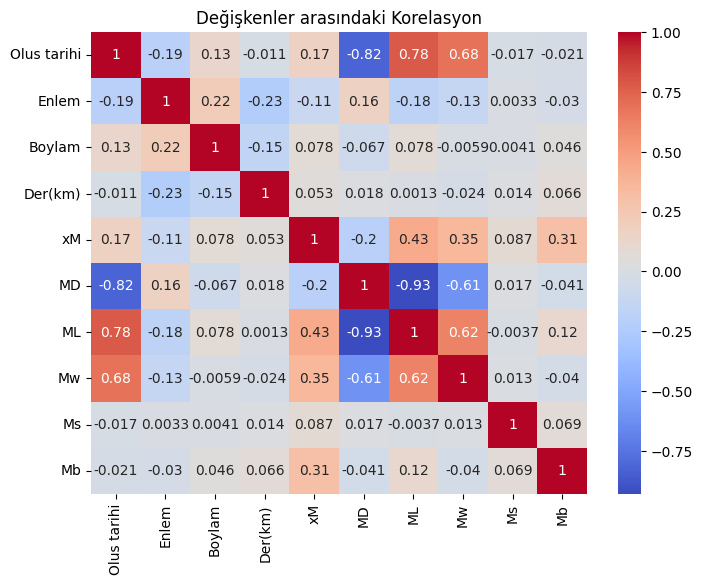

In [786]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = corr_datas.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,cmap="coolwarm" ,annot = True)
plt.title("Değişkenler arasındaki Korelasyon")

plt.show()

# DATA VISUALIZATION

# Değiştirilmiş Mercalli Şiddet Ölçeği
I. Derece Deprem (Aletsel Deprem)

II. Derece Deprem (Çok Hafif Deprem)

III. Derece Deprem (Hafif Deprem)

IV. Derece Deprem (Orta Şiddetli Deprem)

V. Derece Deprem (Oldukça Şiddetli Deprem)

VI. Derece Deprem (Şiddetli Deprem)

VII. Derece Deprem (Çok Şiddetli Deprem)

VIII. Derece Deprem (Yıkıcı Deprem)

IX. Derece Deprem (Çok Yıkıcı Deprem)

X. Derece Deprem (Yok Edici Deprem)

XI. Derece Deprem (Afet Deprem)

XII. Derece Deprem (Büyük Afet Deprem)

![Mercalli Şiddet Ölçeği](https://www.matematiksel.org/wp-content/uploads/2022/11/6_deprem_siddet_buyukluk_tablosu.jpg?ezimgfmt=rs:382x409/rscb228/ng:webp/ngcb227)


Bu bölümde aşağıdaki işlemleri uyguladım:
- Görselleştirmelerimi zamansal ve bölgesel olarak ayırdım ve buna göre görselleştirmeler yaptım.
- Oluş tarihi sütununda yıl verilerini çektim ekstra sütuna ekledim.
- Yer sütunundan şehirleri çektim.
- Şehirlere göre bölgeler dictionarysi oluşturdum ve bunlara göre görselleştirmeler yaptım.

# Zamansal Analizler

In [787]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [788]:
# Oluş tarihi sütununda yalnızca yılları çekilir "Yıllar" adlı sütuna eklenir.
new_data["Yıllar"] = pd.to_datetime(new_data["Olus tarihi"]).dt.year
new_data.head()

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   
1  20230731152316  2023-07-31 1900-01-01 15:23:16.850  38.1413  38.4340   
2  20230731025049  2023-07-31 1900-01-01 02:50:49.840  37.8352  26.8353   
3  20230730201940  2023-07-30 1900-01-01 20:19:40.490  40.8085  31.0183   
4  20230730161352  2023-07-30 1900-01-01 16:13:52.620  38.1290  38.1863   

   Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0      4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1      5.2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2      6.2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3      5.3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4      2.4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                Yer      Koordinatlar  \
0  DOGANLI-PAZARCIK (KAHRAMANMARAS)  37.4153, 37.1703   
1            AKSU-SINCIK (ADIYAMAN)   38.1413, 38.434   
2          SISAM ADASI (EGE DENIZI)  37.8352, 26.8353   
3           ICMELER-GOLYAKA (DUZCE)  40.8085, 31.0183   
4      CAMPINAR-CELIKHAN (ADIYAMAN)   38.129, 38.1863   

                    geometry  Yıllar  
0  POINT (37.41530 37.17030)    2023  
1  POINT (38.14130 38.43400)    2023  
2  POINT (37.83520 26.83530)    2023  
3  POINT (40.80850 31.01830)    2023  
4  POINT (38.12900 38.18630)    2023

In [789]:
# Yıllar içindeki toplam deprem sayıları incelenir.
Toplam_deprem = new_data.groupby("Yıllar").size()

dff = pd.DataFrame(Toplam_deprem.reset_index(name="Toplam Deprem Sayısı"))
dff

Yıllar  Toplam Deprem Sayısı
0     1994                   282
1     1995                  1365
2     1996                  1227
3     1997                   966
4     1998                   740
5     1999                  1653
6     2000                  1542
7     2001                   965
8     2002                  1564
9     2003                  2000
10    2004                  2592
11    2005                  3403
12    2006                  1827
13    2007                  2598
14    2008                  2625
15    2009                  2179
16    2010                  1995
17    2011                  3364
18    2012                  1898
19    2013                   940
20    2014                   939
21    2015                  1001
22    2016                   776
23    2017                  1713
24    2018                   677
25    2019                   974
26    2020                  2212
27    2021                  1257
28    2022                   790
29    2023                  3936

In [489]:
!pip install plotly
!pip install dash-core-components
!pip install dash-html-components
!pip install dash


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [790]:
# Yıllar içindeki toplam deprem sayılarının grafik ile gösterimi.
import plotly.express as px

fig = px.line(dff, x="Yıllar", y="Toplam Deprem Sayısı")
fig.update_xaxes(dtick="M1", tickformat="%Y\n%m", ticklabelmode="period",title = "Yıllar")
fig.update_layout(title="Yıllar İçindeki Toplam Deprem Sayıları", title_x = 0.5)
fig.show()

In [791]:
# Yıllar içindeki toplam deprem sayılarının aylık olarak detaylı gösterimi.

from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

full_df = pd.DataFrame(new_data)

app = Dash(__name__)

app.layout = html.Div([
    html.H4('Deprem Sayıları Analizi',style={"color":"white"}),
    dcc.Graph(id="time-series-chart"),
    html.P("Yıl seçiniz:",style={"color":"white"}),
    dcc.Dropdown(
        id="ticker",
        options=[{'label': str(year), 'value': str(year)} for year in full_df['Yıllar'].unique()],
        value="2023",
        clearable=False,
    ),
])

@app.callback(
    Output("time-series-chart", "figure"),
    Input("ticker", "value"))
def display_time_series(selected_year):
    filtered_df = full_df[full_df['Yıllar']==int(selected_year)]
    grouped_df = filtered_df.groupby('Olus tarihi').size().reset_index(name='Toplam Deprem Sayısı')
    fig = px.line(grouped_df, x='Olus tarihi', y='Toplam Deprem Sayısı', title=f"{selected_year} Yılına Göre Aylık Deprem Sayıları")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True,port=8052)

In [792]:
new_data.head()

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   
1  20230731152316  2023-07-31 1900-01-01 15:23:16.850  38.1413  38.4340   
2  20230731025049  2023-07-31 1900-01-01 02:50:49.840  37.8352  26.8353   
3  20230730201940  2023-07-30 1900-01-01 20:19:40.490  40.8085  31.0183   
4  20230730161352  2023-07-30 1900-01-01 16:13:52.620  38.1290  38.1863   

   Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0      4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1      5.2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2      6.2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3      5.3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4      2.4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                Yer      Koordinatlar  \
0  DOGANLI-PAZARCIK (KAHRAMANMARAS)  37.4153, 37.1703   
1            AKSU-SINCIK (ADIYAMAN)   38.1413, 38.434   
2          SISAM ADASI (EGE DENIZI)  37.8352, 26.8353   
3           ICMELER-GOLYAKA (DUZCE)  40.8085, 31.0183   
4      CAMPINAR-CELIKHAN (ADIYAMAN)   38.129, 38.1863   

                    geometry  Yıllar  
0  POINT (37.41530 37.17030)    2023  
1  POINT (38.14130 38.43400)    2023  
2  POINT (37.83520 26.83530)    2023  
3  POINT (40.80850 31.01830)    2023  
4  POINT (38.12900 38.18630)    2023

In [793]:
# Yıllara göre deprem şiddetinin scatter plot ile gösterimi
import pandas as pd
import plotly.express as px

df = pd.DataFrame(new_data)

fig = px.scatter(df, x="Yıllar", y="xM", title="Yıllara Göre Deprem Şiddeti",
                 labels={"xM": "Deprem Şiddeti"},size="Yıllar",color="xM",color_continuous_scale="viridis")
fig.show()

In [576]:
# Yıllara göre deprem şiddetinin(xM>=4.0) scatter plot ile gösterimi(Hissedilen Depremler)

import pandas as pd
import plotly.express as px

df = pd.DataFrame(new_data)

xM_filtered = df[df["xM"]>=4.0]

fig = px.scatter(xM_filtered, x="Yıllar", y="xM", title="Yıllara Göre Deprem Şiddeti",
                 labels={"xM": "Deprem Şiddeti"},size="Yıllar",color="xM",color_continuous_scale="ylorrd")

fig.update_layout(title_text="Yıllara Göre Deprem Şiddeti (xm >= 4.0) Hissedilen Depremler",
                  xaxis_title="Yıl",
                  yaxis_title="Deprem Şiddeti")

fig.show()

In [794]:
# Zamana bağlı deprem sayıları(15dk aralıklarla)
import plotly.express as px

new_data["Olus zamani"] = pd.to_datetime(new_data["Olus zamani"])

time_df = (
    new_data.groupby(pd.Grouper(key="Olus zamani", freq="15min"))
    .size()
    .reset_index(name="size")
)

time_df["Olus zamani"] = time_df["Olus zamani"].dt.strftime("%H:%M")

fig = px.line(time_df, x="Olus zamani", y="size")
fig.update_xaxes(ticklabelmode="period", title="Zaman")
fig.update_layout(title="Zamana Bağlı Deprem Sayıları", title_x=0.5)
fig.show()


# Bölgesel Analizler

In [795]:
# Yer sütunundan şehir bilgisi çekilir ve farklı bir sütunda yer verilir.
new_data["Sehir"] = new_data["Yer"].str.extract(r'\((.*?)\)')

In [796]:
# Deprem ve Türkiyenin bölgeleri analizi için bölgeler dictionarysi oluşturuldu.
bölgeler = {
    'Marmara': ['ISTANBUL', 'KOCAELI', 'BURSA', 'BALIKESIR', 'CANAKKALE', 'EDIRNE', 'KIRKLARELI', 'TEKIRDAG', 'YALOVA',"MARMARA DENIZI","SAKARYA","BİLECİK"],
    'Ege': ['IZMIR', 'AYDIN', 'MANISA', 'MUGLA', 'AFYONKARAHISAR', 'DENIZLI', 'USAK', 'KUTAHYA',"EGE DENIZI"],
    'Akdeniz': ['ANTALYA', 'MERSIN', 'ADANA', 'HATAY', 'ISPARTA', 'BURDUR', 'OSMANIYE', 'KAHRAMANMARAS', "AKDENIZ"],
    'Karadeniz': ['TRABZON', 'SAMSUN', 'ORDU', 'RIZE', 'GIRESUN', 'SINOP', 'AMASYA', 'TOKAT', 'BARTIN', 'KASTAMONU', 'ZONGULDAK', 'DUZCE',"CORUM","ARTVIN","BAYBURT","GUMUSHANE","BOLU","KARABUK","KARADENIZ"],
    'Ic Anadolu': ['ANKARA', 'KONYA', 'AKSARAY', 'NEVSEHIR', 'KAYSERI', 'KIRSEHIR', 'YOZGAT', 'KARAMAN', 'SIVAS', 'KIRIKKALE',"NIGDE","CANKIRI","ESKIŞEHIR"],
    'Guneydogu Anadolu': ['DIYARBAKIR', 'SANLIURFA', 'ADIYAMAN', 'BATMAN', 'MARDIN', 'SIIRT', 'SIRNAK', 'KILIS', 'GAZIANTEP'],
    'Dogu Anadolu': ['VAN', 'AGRI', 'IGDIR', 'KARS', 'ERZURUM', 'ERZINCAN', 'BINGOL', 'TUNCELI', 'MUS', 'BITLIS', 'ARDAHAN', 'MALATYA', 'ELAZIG',"HAKKARI"]}

new_data["Bolge"] = new_data["Yer"].apply(lambda il: next((bolge for bolge, iller in bölgeler.items() if il in iller), None))

In [797]:
# Bölgesi bulunmayan iller bilgisine bilinmeyen ifadesi atandı.Tr dışı enlem boylam koordinatlarını içerir.
def ilin_bolgesini_bul(il_adi):
    for bolge, iller in bölgeler.items():
        if any(il.lower() in il_adi.lower() for il in iller):
            return bolge
    return "Bilinmeyen"

new_data["Bolge"] = new_data["Yer"].apply(lambda x: ilin_bolgesini_bul(x))

In [798]:
data_bolge = new_data.groupby("Bolge").size()
data_bolge

Bolge
Akdeniz              12490
Bilinmeyen            3694
Dogu Anadolu         10187
Ege                  13445
Guneydogu Anadolu     1586
Ic Anadolu            2893
Karadeniz             2128
Marmara               3577
dtype: int64

In [799]:
new_data.head(3)

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   
1  20230731152316  2023-07-31 1900-01-01 15:23:16.850  38.1413  38.4340   
2  20230731025049  2023-07-31 1900-01-01 02:50:49.840  37.8352  26.8353   

   Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0      4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1      5.2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2      6.2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                Yer      Koordinatlar  \
0  DOGANLI-PAZARCIK (KAHRAMANMARAS)  37.4153, 37.1703   
1            AKSU-SINCIK (ADIYAMAN)   38.1413, 38.434   
2          SISAM ADASI (EGE DENIZI)  37.8352, 26.8353   

                    geometry  Yıllar          Sehir              Bolge  
0  POINT (37.41530 37.17030)    2023  KAHRAMANMARAS            Akdeniz  
1  POINT (38.14130 38.43400)    2023       ADIYAMAN  Guneydogu Anadolu  
2  POINT (37.83520 26.83530)    2023     EGE DENIZI                Ege

In [800]:
# Seçilecek bölgeye göre yılla içindeki toplam deprem sayıları
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html, Input, Output

using_bolge = pd.DataFrame(new_data)

app = Dash(__name__)

app.layout = html.Div([
    html.H4("Deprem Sayıları Analizi",style = {"color": "white"}),
    
    html.P("Bölge seçiniz:",style = {"color": "white"}),
    dcc.Dropdown(
        id="bolge-selector",
        options=[{"label": bolge, "value": bolge} for bolge in using_bolge["Bolge"].unique()],
        value= "Marmara",  # Varsayılan olarak gösterilecek bölgeyi ayarla.
        clearable=False,
    ),
    
    dcc.Graph(id="time-series-chart"),
])


@app.callback(
    Output("time-series-chart", "figure"),
    Input("bolge-selector", "value"))
def display_time_series(selected_bolge):
    filtered_df = using_bolge[using_bolge["Bolge"] == selected_bolge]
    grouped_df = filtered_df.groupby("Yıllar").size().reset_index(name="Toplam Deprem Sayısı")
    fig = px.bar(grouped_df, x="Yıllar", y="Toplam Deprem Sayısı", title=f"{selected_bolge} Bölgesine Göre Aylık Deprem Sayıları")
    fig.update_xaxes(dtick="M1", tickformat="%Y\n%m", ticklabelmode="period",title = "Yıllar")
    return fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8054)

In [801]:
sehir_size= new_data.groupby("Sehir").size()
data_sehir = pd.DataFrame(sehir_size.reset_index(name="Toplam Deprem Sayısı"))
data_sehir.head()

Sehir  Toplam Deprem Sayısı
0           ADANA                   708
1        ADIYAMAN                   528
2  AFYONKARAHISAR                  1445
3  AFYONKARAHiSAR                    21
4            AGRI                   235

In [802]:
import pandas as pd
import plotly.express as px

using_data = pd.DataFrame(data_sehir)

# Histogram çizimi
fig = px.bar(using_data, x="Toplam Deprem Sayısı", y="Sehir", orientation="h",
             title="Şehirlere Göre Toplam Deprem Sayıları",
             labels={"Toplam Deprem Sayısı": "Deprem Sayısı", "Sehir": "Şehir"},
             color="Toplam Deprem Sayısı",  # Her şehrin rengini deprem sayısına göre belirle
             color_continuous_scale="turbo",  # Renk skalası
             )
fig.update_layout(xaxis_title="Deprem Sayısı", yaxis_title="Şehirler",
                  width=1000, height=1000)  # Genişlik ve yükseklik değerlerini burada ayarlayabilirsiniz
fig.show()

# diğer renk seçenekleri:'tealrose', 'tempo', 'temps', 'thermal', 'tropic', 'turbid','turbo', 'twilight', 'viridis', 'ylgn', 'ylgnbu', 'ylorbr'

In [803]:
# Hissedilmeyecek şiddette olan depremleri filtrele
filtered_data = new_data[new_data["xM"] >= 4.0]

In [804]:
import plotly.express as px

fig = px.scatter_geo(filtered_data,lat=filtered_data["Enlem"],lon=filtered_data["Boylam"],color="xM",
                     color_continuous_scale="Reds",hover_name="Yer",hover_data={"Yıllar": True},fitbounds="locations",
                     basemap_visible=True, opacity=0.5, title="Hissedilen Depremlerin Harita üzerinde Gösterimi"
)
fig.update_layout(autosize=False,width=800,height=600,)
fig.show()


In [805]:
# Veri setinde en yüksek 50 xM değeri çekilir.
top_50_xM_values = new_data.nlargest(50, "xM")

In [806]:
# Filtrelenen top 50 veriye göre harita üzerinde gösterim yapılır.
import plotly.express as px

fig = px.density_mapbox(top_50_xM_values, lat=top_50_xM_values["Enlem"], lon=top_50_xM_values["Boylam"], z=top_50_xM_values["xM"],
                        center=dict(lat=39.42, lon=35), zoom=4.5,mapbox_style="open-street-map",radius=25,opacity=0.8,
                        hover_data={"Yıllar":True,"Yer":True,"Enlem":False,"Boylam":False,"Der(km)":True})

fig.update_layout(title_text='En Şiddetli 50 Deprem',
                  title_x=0.5, title_font=dict(size=25))
fig.show()

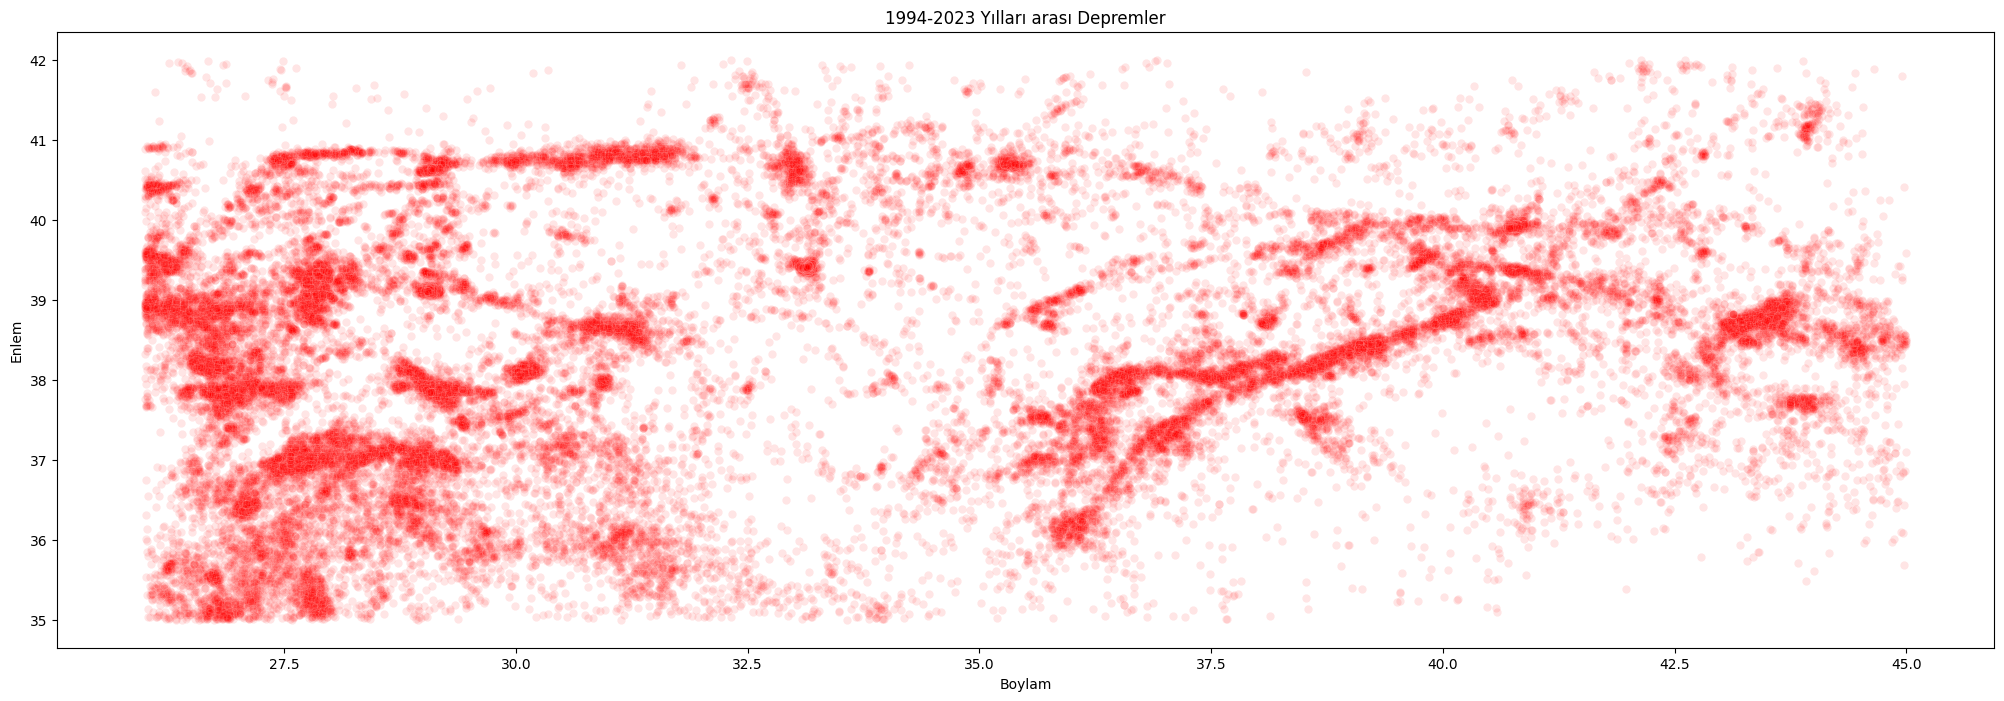

In [807]:
# 1994 yılından 2023 yılına kadar olan depremlerin scatterplot ile harita üzerinde gösterimi.
plt.figure(figsize=(25,8))

sns.scatterplot(data = new_data, x = "Boylam" , y = "Enlem",alpha = 0.1, color = "red")
plt.title("1994-2023 Yılları arası Depremler")
plt.show()

# GENEL ANALİZLER

In [810]:
new_data.head(1)

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   

   Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0      4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   

                                Yer      Koordinatlar  \
0  DOGANLI-PAZARCIK (KAHRAMANMARAS)  37.4153, 37.1703   

                    geometry  Yıllar          Sehir    Bolge  
0  POINT (37.41530 37.17030)    2023  KAHRAMANMARAS  Akdeniz

In [813]:
# En büyük şiddete sahip deprem
max_magnitude_earthquake = new_data.loc[new_data["xM"].idxmax()]

# Gerekli bilgileri yazdırma
print("En büyük şiddete sahip deprem:")
print(f"Oluş tarihi: {max_magnitude_earthquake['Olus tarihi']}")
print(f"Şiddet: {max_magnitude_earthquake['xM']}")
print(f"Şehir: {max_magnitude_earthquake['Sehir']}")
print(f"Bölge: {max_magnitude_earthquake['Bolge']}")


En büyük şiddete sahip deprem:
Oluş tarihi: 2023-02-06 00:00:00
Şiddet: 7.7
Şehir: GAZIANTEP
Bölge: Guneydogu Anadolu


In [815]:
#En düşük şiddete sahip deprem hangisidir?
min_magnitude = new_data.loc[new_data["xM"].idxmin()]

# Gerekli bilgileri yazdırma
print("En büyük şiddete sahip deprem:")
print(f"Oluş tarihi: {min_magnitude['Olus tarihi']}")
print(f"Şiddet: {min_magnitude['xM']}")
print(f"Şehir: {min_magnitude['Sehir']}")
print(f"Bölge: {min_magnitude['Bolge']}")

En büyük şiddete sahip deprem:
Oluş tarihi: 2023-07-31 00:00:00
Şiddet: 3.0
Şehir: EGE DENIZI
Bölge: Ege


In [816]:
# Büyüklüğü(xM) 7'nin üzerinde olan kaç tane deprem kaydedilmiştir?
num_large_earthquakes = new_data[new_data["xM"] > 7].shape[0]
print(f"Büyüklüğü 7'nin üzerinde olan {num_large_earthquakes} tane deprem kaydedilmiştir.")

Büyüklüğü 7'nin üzerinde olan 5 tane deprem kaydedilmiştir.


In [817]:
#Büyüklüğü 6'nın üzerinde olan depremlerin ortalama büyüklüğü nedir?
avg_magnitude_over_6 = data[data["xM"] > 6]["xM"].mean()
print(f"Büyüklüğü 6'nın üzerinde olan depremlerin ortalama büyüklüğü {avg_magnitude_over_6}.")

Büyüklüğü 6'nın üzerinde olan depremlerin ortalama büyüklüğü 6.595454545454545.


In [818]:
#Büyüklüğü 5 ve altında olan depremlerin ortalama büyüklüğü nedir?
avg_magnitude_under_5 = data[data["xM"] <= 5]["xM"].mean()
print(f"Büyüklüğü 5 ve altında olan depremlerin ortalama büyüklüğü {avg_magnitude_under_5}.")

Büyüklüğü 5 ve altında olan depremlerin ortalama büyüklüğü 3.332931096898757.


# DATA MODELLING

In [591]:
new_data.head(5)

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   
1  20230731152316  2023-07-31 1900-01-01 15:23:16.850  38.1413  38.4340   
2  20230731025049  2023-07-31 1900-01-01 02:50:49.840  37.8352  26.8353   
3  20230730201940  2023-07-30 1900-01-01 20:19:40.490  40.8085  31.0183   
4  20230730161352  2023-07-30 1900-01-01 16:13:52.620  38.1290  38.1863   

   Der(km)   xM   MD   ML   Mw   Ms   Mb Tip  \
0      4.0  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
1      5.2  3.5  0.0  3.5  3.4  0.0  0.0  Ke   
2      6.2  3.0  0.0  3.0  0.0  0.0  0.0  Ke   
3      5.3  3.1  0.0  3.1  3.1  0.0  0.0  Ke   
4      2.4  3.0  0.0  3.0  0.0  0.0  0.0  Ke   

                                Yer      Koordinatlar  \
0  DOGANLI-PAZARCIK (KAHRAMANMARAS)  37.4153, 37.1703   
1            AKSU-SINCIK (ADIYAMAN)   38.1413, 38.434   
2          SISAM ADASI (EGE DENIZI)  37.8352, 26.8353   
3           ICMELER-GOLYAKA (DUZCE)  40.8085, 31.0183   
4      CAMPINAR-CELIKHAN (ADIYAMAN)   38.129, 38.1863   

                    geometry  Yıllar          Sehir              Bolge  
0  POINT (37.41530 37.17030)    2023  KAHRAMANMARAS            Akdeniz  
1  POINT (38.14130 38.43400)    2023       ADIYAMAN  Guneydogu Anadolu  
2  POINT (37.83520 26.83530)    2023     EGE DENIZI                Ege  
3  POINT (40.80850 31.01830)    2023          DUZCE          Karadeniz  
4  POINT (38.12900 38.18630)    2023       ADIYAMAN  Guneydogu Anadolu

In [510]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [592]:
new_data.loc[new_data["xM"] >= 7.0, "Deprem Etkisi"] = "Çok güçlü"
new_data.loc[ (new_data["xM"] >= 5.9) & (new_data["xM"] < 7.0), "Deprem Etkisi"] = "Güçlü"
new_data.loc[ (new_data["xM"] >= 4.0) & (new_data["xM"] < 5.9), "Deprem Etkisi"] = "Orta"
new_data.loc[ (new_data["xM"] >= 0.0) & (new_data["xM"] < 4.0), "Deprem Etkisi"] = "Düşük"

In [593]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
new_data["Yıllar_encoded"]= label_encoder.fit_transform(new_data["Yıllar"])
new_data["Sehir_encoded"]= label_encoder.fit_transform(new_data["Sehir"])
new_data["Der(km)_encoded"]= label_encoder.fit_transform(new_data["Der(km)"])
new_data["Deprem Etkisi_encoded"]= label_encoder.fit_transform(new_data["Deprem Etkisi"])
new_data["xM_encoded"]= label_encoder.fit_transform(new_data["xM"])

In [762]:
new_data[new_data["xM"]>7.0]

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
3502   20230206102447  2023-02-06 1900-01-01 10:24:47.880  38.0818  37.1773   
3765   20230206011732  2023-02-06 1900-01-01 01:17:32.670  37.1757  37.0850   
18684  20111023104121  2011-10-23 1900-01-01 10:41:21.010  38.7212  43.4110   
44180  19991112165720  1999-11-12 1900-01-01 16:57:20.800  40.7400  31.2100   
44749  19990817000137  1999-08-17 1900-01-01 00:01:37.600  40.7600  29.9700   

       Der(km)   xM   MD   ML   Mw  ...          Sehir              Bolge  \
3502       5.0  7.6  0.0  7.4  7.6  ...  KAHRAMANMARAS            Akdeniz   
3765       5.5  7.7  0.0  7.5  7.7  ...      GAZIANTEP  Guneydogu Anadolu   
18684      5.0  7.2  0.0  6.7  7.2  ...            VAN       Dogu Anadolu   
44180     25.0  7.2  0.0  0.0  7.2  ...          DUZCE          Karadeniz   
44749     18.0  7.4  6.7  0.0  7.4  ...        KOCAELI            Marmara   

      Deprem Etkisi Tip_encoded Yıllar_encoded Sehir_encoded  Bolge_encoded  \
3502      Çok güçlü           0             29            58              0   
3765      Çok güçlü           0             29            46              4   
18684     Çok güçlü           0             17           111              2   
44180     Çok güçlü           0              5            35              6   
44749     Çok güçlü           0              5            73              7   

      Der(km)_encoded Deprem Etkisi_encoded xM_encoded  
3502               45                     3         40  
3765               50                     3         41  
18684              45                     3         38  
44180             245                     3         38  
44749             175                     3         39  

[5 rows x 27 columns]

In [601]:
# Gerekli Kütüphaneler yüklenir
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.svm import SVR


In [596]:
new_data.head(1)

Deprem Kodu Olus tarihi             Olus zamani    Enlem   Boylam  \
0  20230731215338  2023-07-31 1900-01-01 21:53:38.290  37.4153  37.1703   

   Der(km)   xM   MD   ML   Mw  ...          Sehir    Bolge Deprem Etkisi  \
0      4.0  3.5  0.0  3.5  3.4  ...  KAHRAMANMARAS  Akdeniz         Düşük   

  Tip_encoded Yıllar_encoded Sehir_encoded  Bolge_encoded Der(km)_encoded  \
0           0             29            58              0              35   

  Deprem Etkisi_encoded xM_encoded  
0                     0          5  

[1 rows x 27 columns]

# DECISION TREE CLASSIFIERS

In [747]:
# Bağımlı ve bağımsız Değişken seçilir
features = new_data[["Sehir_encoded", "Der(km)_encoded","Yıllar_encoded"]]
target = new_data["Deprem Etkisi"]

In [748]:
# Veriyi Eğitim ve Test Setlerine ayırma işlemi yapılır.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

print("Eğitim verisi boyutu: ",X_train.shape, y_train.shape)
print("Test verisi boyutu: ",X_test.shape, y_test.shape)

Eğitim verisi boyutu:  (40000, 3) (40000,)
Test verisi boyutu:  (10000, 3) (10000,)


In [749]:
cellTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(cellTree)

DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [750]:
cellTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [751]:
yhat_dt = cellTree.predict(X_test)

acc = metrics.accuracy_score(y_test, yhat_dt)
print('karar agaci icin accuracy: ',acc)

karar agaci icin accuracy:  0.922


In [752]:
#karar agaci icin confusion matrix ve metrik degerler
cellTree_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

#train model with cv of 10 burda modeli 10 cross validasyon ile scorelari verdik
cv_scores_dt = cross_val_score(cellTree_dt, features,target, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores_dt)

print('cv_scores mean:{}'.format(np.mean(cv_scores_dt)))

[0.0987 0.1098 0.2076 0.1815 0.2079]
cv_scores mean:0.1611


In [753]:
from sklearn.metrics import classification_report

prec_dt = classification_report(yhat_dt,y_test)
print(prec_dt)

c:\Users\MyPc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

c:\Users\MyPc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

       Düşük       1.00      0.92      0.96     10000
       Güçlü       0.00      0.00      0.00         0
        Orta       0.00      0.00      0.00         0
   Çok güçlü       0.00      0.00      0.00         0

    accuracy                           0.92     10000
   macro avg       0.25      0.23      0.24     10000
weighted avg       1.00      0.92      0.96     10000



c:\Users\MyPc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [754]:
# X_test verileri üzerinde tahmin yapma
y_pred = cellTree.predict(X_test)

# Tahmin sonuçlarını inceleme
print("Gerçek Değerler: ", y_test.values)
print("Tahmin Edilen Değerler: ", y_pred)


Gerçek Değerler:  ['Düşük' 'Düşük' 'Düşük' ... 'Düşük' 'Düşük' 'Düşük']
Tahmin Edilen Değerler:  ['Düşük' 'Düşük' 'Düşük' ... 'Düşük' 'Düşük' 'Düşük']


In [755]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[9220    0    0    0]
 [   9    0    0    0]
 [ 769    0    0    0]
 [   2    0    0    0]]


In [756]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1 Score:", f1)

Weighted F1 Score: 0.8845827263267428


In [746]:
sehir_encoded_value = 58
der_km_encoded_value = 45
yillar_encoded_value = 29

# Yeni veri noktası
new_data_point = pd.DataFrame({
    'Sehir_encoded': [sehir_encoded_value],
    'Der(km)_encoded': [der_km_encoded_value],
    'Yıllar_encoded': [yillar_encoded_value]
})

# Modeli kullanarak tahmin yapma
predicted_value = cellTree.predict(new_data_point)

# Tahmin sonucunu yazdırma
print(f'Predicted Earthquake Impact: {predicted_value[0]}')


Predicted Earthquake Impact: Düşük


# KNN MODEL

In [723]:
# Bağımlı ve bağımsız Değişken seçilir
features1 = new_data[["Sehir_encoded", "Der(km)_encoded","Yıllar_encoded"]]
target1 = new_data["Deprem Etkisi"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features1, target1, test_size=0.2, random_state=20)

In [724]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)

# fit models
neigh = knn_model.fit(X_train_1,y_train_1)

# predict
yhatknn=neigh.predict(X_test_1)

In [725]:
accknn = metrics.accuracy_score(y_test_1, yhatknn)
print('KNN icin accuracy',accknn)

#knn=3 icin confusion matrix ve metrik degerler
knn_knn = KNeighborsClassifier(n_neighbors = 3)

cv_scores_knn = cross_val_score(knn_knn, features1,target1, cv=5)

print(cv_scores_knn)
print('cv_scores mean:{}'.format(np.mean(cv_scores_knn)))

KNN icin accuracy 0.8987
[0.3151 0.4855 0.7506 0.8319 0.9187]
cv_scores mean:0.6603600000000001


In [710]:
#knn scores
from sklearn.metrics import classification_report
prec_knn = classification_report(yhatknn,y_test_1,zero_division=1)
print(prec_knn)

              precision    recall  f1-score   support

       Düşük       0.97      0.92      0.95      9708
       Güçlü       0.00      1.00      0.00         0
        Orta       0.07      0.18      0.10       292
   Çok güçlü       0.00      1.00      0.00         0

    accuracy                           0.90     10000
   macro avg       0.26      0.78      0.26     10000
weighted avg       0.95      0.90      0.92     10000



In [726]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
conf_mat = confusion_matrix(y_test_1, y_pred)
print("Confusion Matrix:\n", conf_mat)


Confusion Matrix:
 [[9171    0    0    0]
 [   8    0    0    0]
 [ 820    0    0    0]
 [   1    0    0    0]]


In [727]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test_1, y_pred, average='weighted')
print("Weighted F1 Score:", f1)

Weighted F1 Score: 0.877442397371029


In [759]:
sehir_encoded_value = 58
der_km_encoded_value = 45
yillar_encoded_value = 29

# Yeni veri noktası
new_data_point_2 = pd.DataFrame({
    'Sehir_encoded': [sehir_encoded_value],
    'Der(km)_encoded': [der_km_encoded_value],
    'Yıllar_encoded': [yillar_encoded_value]
})

# Modeli kullanarak tahmin yapma
predicted_value = knn_model.predict(new_data_point_2)

# Tahmin sonucunu yazdırma
print(f'Predicted Earthquake Impact: {predicted_value[0]}')


Predicted Earthquake Impact: Düşük


#  RANDOM FOREST

In [728]:
# Bağımlı ve bağımsız Değişken seçilir
features3 = new_data[["Sehir_encoded", "Der(km)_encoded","Yıllar_encoded"]]
target3 = new_data["Deprem Etkisi_encoded"]
X_train, X_test, y_train, y_test = train_test_split(features3, target3, test_size=0.2, random_state=20)

In [729]:
# Ön İşleme ve Modelleme
model3 = make_pipeline(StandardScaler(), RandomForestRegressor())
model3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [730]:
# Modeli Test Etme
y_pred = model3.predict(X_test)

In [731]:
# Performans Metrikleri kontrolü
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
r2 = r2_score(y_test, y_pred) 
print(f'R2 Score: {r2}')

Mean Squared Error: 0.3395164950976471
Mean Absolute Error: 0.2873019855966508
R2 Score: -0.12258385516391801


# 2.Random forest

In [732]:
# Bağımlı ve bağımsız Değişken seçilir
features4 = new_data[["Sehir_encoded", "Der(km)_encoded","Yıllar_encoded","Deprem Etkisi_encoded"]]
target4 = new_data["xM"]
X_train, X_test, y_train, y_test = train_test_split(features4, target4, test_size=0.2, random_state=20)

In [733]:
# Ön İşleme ve Modelleme
model4 = make_pipeline(StandardScaler(), RandomForestRegressor())
model4.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [734]:
# Modeli Test Etme
y_pred = model4.predict(X_test)

In [735]:
# Performans Metrikleri kontrolü
mse4 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse4}')
mae4 = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae4}')
r2_4 = r2_score(y_test, y_pred) 
print(f'R2 Score: {r2_4}')

Mean Squared Error: 0.06990465892064733
Mean Absolute Error: 0.20484576896063209
R2 Score: 0.5655076377815189


In [769]:
sehir_encoded_value = 46
der_km_encoded_value = 50
yillar_encoded_value = 29
Deprem_Etkisi_encoded_value = 3

# Yeni veri noktası
new_data_point_3 = pd.DataFrame({
    'Sehir_encoded': [sehir_encoded_value],
    'Der(km)_encoded': [der_km_encoded_value],
    'Yıllar_encoded': [yillar_encoded_value],
    "Deprem Etkisi_encoded":[Deprem_Etkisi_encoded_value]
})

# Modeli kullanarak tahmin yapma
predicted_value = model4.predict(new_data_point_3)

# Tahmin sonucunu yazdırma
print(f'Predicted Earthquake Impact: {predicted_value[0]}')


Predicted Earthquake Impact: 7.512000000000009
